In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi
from pytimeparse.timeparse import timeparse
import ast

%config Completer.use_jedi = False


In [2]:
# read data

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "experiment_results"
result_file = "results_all.csv"


filepath = os.path.join(folder_name, f"{dataset_path}/{result_file}")
dataframe = pd.read_csv(filepath)
dataframe



,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time
0,all-in-path,football/football.csv/id--football/differences...,CART,2.0,0.798761,2.075651,0.081938,2.157589,{'strong_score': 1.0},NaN
1,all-in-path,football/football.csv/id--football/differences...,ID3,2.0,0.519043,2.075651,269.792025,271.867676,{},NaN
2,all-in-path,football/football.csv/id--football/differences...,XGBoost,1.0,0.784404,2.075651,0.772123,2.847774,"{'date': 0.033, 'weak_team': 0.018, 'dif_overa...",NaN
3,best-ranked,football/football.csv/id--football/differences...,CART,4.0,0.785202,2.075651,0.087464,2.163115,"{'date': 0.022, 'dif_midfield': 0.016, 'id': 0...",NaN
4,best-ranked,football/football.csv/id--football/differences...,ID3,4.0,0.528358,2.075651,173.252891,175.328542,{},NaN
...,...,...,...,...,...,...,...,...,...,...
103,non-aug,other-data/decision-trees-split/titanic,ID3,2.0,0.383783,NaN,28.246128,28.246128,{},NaN
104,non-aug,other-data/decision-trees-split/titanic,XGBoost,1.0,0.562484,NaN,0.140772,0.140772,"{'PassengerId': 0.491, 'TicketId': 0.509}",NaN
105,non-aug,other-data/data/WebKP 2,CART,1.0,0.470925,NaN,0.012028,0.012028,{'webpage_id': 1.0},NaN
106,non-aug,other-data/data/WebKP 2,ID3,2.0,0.091131,NaN,13.375112,13.375112,{},NaN


In [3]:
# get original (base) table name from dataset name 

def shorten_dataset_name_join(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

def half_time(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

dataframe['dataset'] = dataframe['data_path'].apply(lambda x: shorten_dataset_name_join(x))

dataframe


,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time,dataset
0,all-in-path,football/football.csv/id--football/differences...,CART,2.0,0.798761,2.075651,0.081938,2.157589,{'strong_score': 1.0},NaN,football
1,all-in-path,football/football.csv/id--football/differences...,ID3,2.0,0.519043,2.075651,269.792025,271.867676,{},NaN,football
2,all-in-path,football/football.csv/id--football/differences...,XGBoost,1.0,0.784404,2.075651,0.772123,2.847774,"{'date': 0.033, 'weak_team': 0.018, 'dif_overa...",NaN,football
3,best-ranked,football/football.csv/id--football/differences...,CART,4.0,0.785202,2.075651,0.087464,2.163115,"{'date': 0.022, 'dif_midfield': 0.016, 'id': 0...",NaN,football
4,best-ranked,football/football.csv/id--football/differences...,ID3,4.0,0.528358,2.075651,173.252891,175.328542,{},NaN,football
...,...,...,...,...,...,...,...,...,...,...,...
103,non-aug,other-data/decision-trees-split/titanic,ID3,2.0,0.383783,NaN,28.246128,28.246128,{},NaN,titanic
104,non-aug,other-data/decision-trees-split/titanic,XGBoost,1.0,0.562484,NaN,0.140772,0.140772,"{'PassengerId': 0.491, 'TicketId': 0.509}",NaN,titanic
105,non-aug,other-data/data/WebKP 2,CART,1.0,0.470925,NaN,0.012028,0.012028,{'webpage_id': 1.0},NaN,WebKP 2
106,non-aug,other-data/data/WebKP 2,ID3,2.0,0.091131,NaN,13.375112,13.375112,{},NaN,WebKP 2


In [4]:
df1 = dataframe[(dataframe['approach']=='best-ranked') | (dataframe['approach']=='all-in-path')]

df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
df1['train_time'] = dataframe.apply(lambda x: x['train_time']/2, axis=1)

df2 = dataframe[(dataframe['approach']!='best-ranked')  & (dataframe['approach']!='all-in-path')]

df = pd.concat([df1, df2])
df['approach'].unique()


/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:5: SettingWithCopyWarning: 
A val

array(['all-in-path', 'best-ranked', 'join_all', 'arda', 'join_all_ffs',
       'non-aug'], dtype=object)

In [5]:
# get global variables 

algs = dataframe['algorithm'].unique()
print(algs)

tables = dataframe['dataset'].unique()
print(tables)

approach = dataframe['approach'].unique()
print(approach)


['CART' 'ID3' 'XGBoost']
['football' 'CiteSeer' 'steel-plate-fault' 'titanic' 'CORA' 'WebKP 2'
 'PubMed_Diabetes']
['all-in-path' 'best-ranked' 'join_all' 'arda' 'join_all_ffs' 'non-aug']


In [8]:
best_ranked = dataframe[dataframe['approach']=='best-ranked']
# display(best_ranked)

all_path = dataframe[dataframe['approach']=='all-in-path']
# display(all_path)

join_all = dataframe[dataframe['approach']=='join_all']
# display(join_all)

arda = dataframe[dataframe['approach']=='arda']
# display(best_ranked)

join_all_ffs = dataframe[dataframe['approach']=='join_all_ffs']
# display(all_path)

non_aug = dataframe[dataframe['approach']=='non-aug']
# display(join_all)


best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='accuracy').reset_index()
display(best_ranked_df)


,dataset,algorithm,depth,approach,accuracy
0,CORA,CART,2.0,best-ranked,13.672449
1,CORA,ID3,2.0,best-ranked,141.629316
2,CORA,XGBoost,2.0,best-ranked,17.610713
3,CiteSeer,CART,2.0,best-ranked,22.190914
4,CiteSeer,ID3,2.0,best-ranked,328.843436
5,CiteSeer,XGBoost,2.0,best-ranked,25.701921
6,PubMed_Diabetes,CART,1.0,best-ranked,229.851524
7,PubMed_Diabetes,ID3,2.0,best-ranked,1440.874151
8,PubMed_Diabetes,XGBoost,1.0,best-ranked,234.404030
9,WebKP 2,CART,1.0,best-ranked,0.847062


In [9]:
# accuracy 
accuracy = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['accuracy'].max().to_frame(name='accuracy').reset_index()
    if accuracy is None:
        accuracy = dff
    else:
        accuracy = pd.concat([accuracy, dff])
        
display(accuracy)
    

,dataset,algorithm,depth,approach,accuracy
0,CORA,CART,2.0,all-in-path,0.275875
1,CORA,ID3,2.0,all-in-path,0.080113
2,CORA,XGBoost,2.0,all-in-path,0.083556
3,CiteSeer,CART,2.0,all-in-path,0.230067
4,CiteSeer,ID3,2.0,all-in-path,0.201704
...,...,...,...,...,...
13,steel-plate-fault,ID3,2.0,non-aug,0.347938
14,steel-plate-fault,XGBoost,9.0,non-aug,0.601800
15,titanic,CART,1.0,non-aug,0.624020
16,titanic,ID3,2.0,non-aug,0.383783


In [10]:
# train time
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])
        
display(train_time)
    

,dataset,algorithm,depth,approach,train_time
0,CORA,CART,2.0,all-in-path,0.023934
1,CORA,ID3,2.0,all-in-path,63.995586
2,CORA,XGBoost,2.0,all-in-path,1.999873
3,CiteSeer,CART,2.0,all-in-path,0.036120
4,CiteSeer,ID3,2.0,all-in-path,152.982974
...,...,...,...,...,...
13,steel-plate-fault,ID3,2.0,non-aug,69.772675
14,steel-plate-fault,XGBoost,9.0,non-aug,1.973460
15,titanic,CART,1.0,non-aug,0.013995
16,titanic,ID3,2.0,non-aug,28.246128


In [11]:
# train time
total_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()
    if total_time is None:
        total_time = dff
    else:
        total_time = pd.concat([total_time, dff])
        
display(total_time)

,dataset,algorithm,depth,approach,total_time
0,CORA,CART,2.0,all-in-path,6.833441
1,CORA,ID3,2.0,all-in-path,70.805094
2,CORA,XGBoost,2.0,all-in-path,8.809380
3,CiteSeer,CART,2.0,all-in-path,11.092015
4,CiteSeer,ID3,2.0,all-in-path,164.038869
...,...,...,...,...,...
13,steel-plate-fault,ID3,2.0,non-aug,69.772675
14,steel-plate-fault,XGBoost,9.0,non-aug,1.973460
15,titanic,CART,1.0,non-aug,0.013995
16,titanic,ID3,2.0,non-aug,28.246128


In [12]:
depth = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['depth'].max().to_frame(name='depth').reset_index()
    if depth is None:
        depth = dff
    else:
        depth = pd.concat([depth, dff])

In [13]:
join_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = df[(df['dataset']!='PubMed_Diabetes') & (df['dataset']!='CiteSeer') & (df['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['join_time'].max().to_frame(name='join_time').reset_index()
    if join_time is None:
        join_time = dff
    else:
        join_time = pd.concat([join_time, dff])

In [14]:
# Separate into 2 datasets
small_datasets = ['football', 'steel-plate-fault', 'titanic']
big_datasets = ['CORA', 'WebKP 2', 'CiteSeer']

,dataset,algorithm,depth,approach,accuracy
0,CORA,CART,2.0,all-in-path,0.275875
1,CORA,ID3,2.0,all-in-path,0.080113
2,CORA,XGBoost,2.0,all-in-path,0.083556
3,CiteSeer,CART,2.0,all-in-path,0.230067
4,CiteSeer,ID3,2.0,all-in-path,0.201704


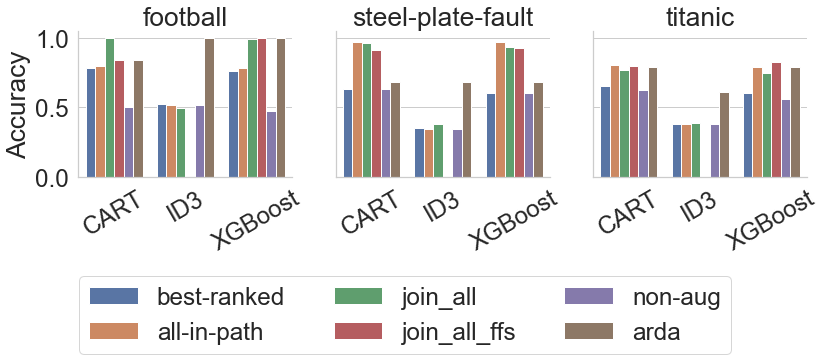

In [15]:
# Accuracy of BestRank, JoinAll and Non-Aug

# SMALL DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(small_datasets)]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-small.pdf', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,accuracy
3,CiteSeer,CART,2.0,best-ranked,0.230067
13,football,ID3,4.0,best-ranked,0.528358
16,steel-plate-fault,ID3,4.0,best-ranked,0.355155
4,CiteSeer,ID3,2.0,best-ranked,0.201704
19,titanic,ID3,2.0,best-ranked,0.383783


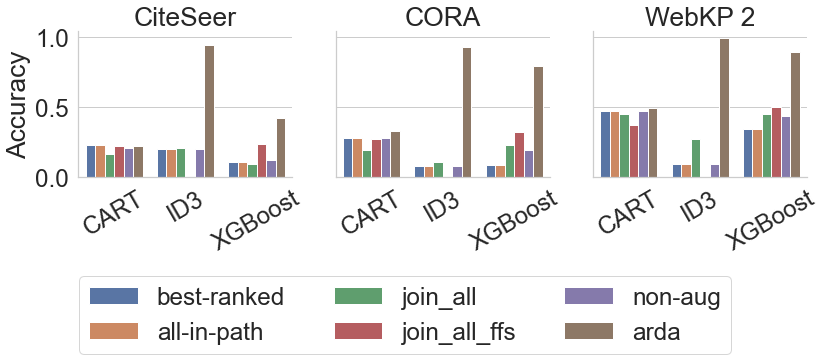

In [16]:
# Accuracy of BestRank, JoinAll and Non-Aug

# BIG DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(big_datasets)]
# accuracy_filtered = accuracy_filtered[accuracy_filtered["approach"] != "arda"]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-big.pdf', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,total_time
0,CORA,CART,2.0,best-ranked,6.836225
1,CORA,ID3,2.0,best-ranked,70.814658
2,CORA,XGBoost,2.0,best-ranked,8.805357
3,CiteSeer,CART,2.0,best-ranked,11.095457
4,CiteSeer,ID3,2.0,best-ranked,164.421718


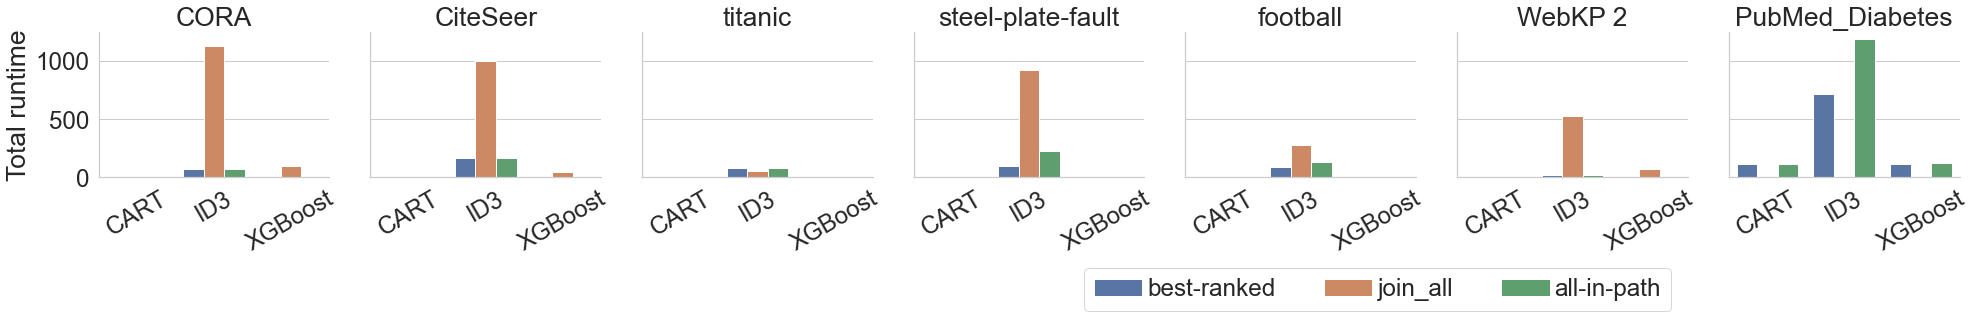

In [17]:
# Accuracy of BestRank, JoinAll and Non-Aug

best_ranked = df[df['approach']=='best-ranked']
# display(best_ranked)

all_path = df[df['approach']=='all-in-path']
# display(all_path)

join_all = df[df['approach']=='join_all']
# display(join_all)

best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

all_path_df = all_path.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

join_all_df = join_all.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

concat_df = pd.concat([best_ranked_df, all_path_df, join_all_df])

display(concat_df.head())

# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

concat_df.sort_values(by=['algorithm'], ascending=True, inplace=True)
# concat_df.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=concat_df, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total runtime')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/runtime-all.pdf', dpi=300, bbox_inches="tight")





,dataset,algorithm,depth,approach,join_time
0,WebKP 2,CART,1.0,all-in-path,0.404428
4,WebKP 2,CART,2.0,arda,0.062948
5,WebKP 2,CART,3.0,join_all,0.072210
17,football,CART,1.0,non-aug,NaN
37,steel-plate-fault,CART,7.0,non-aug,NaN
...,...,...,...,...,...
12,WebKP 2,XGBoost,2.0,all-in-path,0.404428
13,WebKP 2,XGBoost,2.0,arda,0.062948
14,WebKP 2,XGBoost,2.0,best-ranked,0.404428
14,WebKP 2,XGBoost,2.0,best-ranked,0.404428


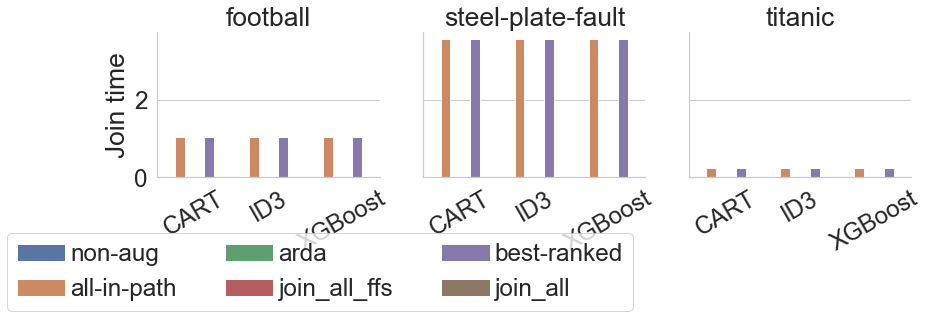

In [18]:



# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

### SMALL DATASETS JOIN TIME

join_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
# join_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)
join_time_filtered = join_time[join_time['dataset'].isin(small_datasets)]

display(join_time)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="join_time", hue="approach", col="dataset", data=join_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Join time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/join-time-all.pdf', dpi=300, bbox_inches="tight")




In [19]:
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
#     dff = dataframe[(dataframe['dataset']!='PubMed_Diabetes') & (dataframe['dataset']!='CiteSeer') & (dataframe['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3626876303.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)


,dataset,algorithm,approach,train_time
15,steel-plate-fault,CART,best-ranked,-2.770432+0.000000j
12,football,CART,best-ranked,-3.129674+0.000000j
9,football,CART,arda,-4.488276+0.000000j
18,titanic,CART,best-ranked,-3.394643+0.000000j
12,steel-plate-fault,CART,arda,-4.381279+0.000000j
15,titanic,CART,arda,-4.595420+0.000000j
10,football,ID3,arda,-0.659622+0.000000j
16,titanic,ID3,arda,-3.004397+0.000000j
13,steel-plate-fault,ID3,arda,-2.867076+0.000000j
13,football,ID3,best-ranked,4.461605+0.000000j


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  poi

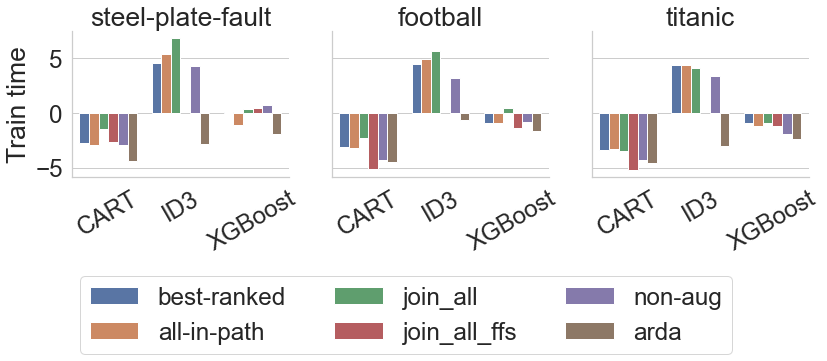

In [26]:
# Accuracy of BestRank, JoinAll and Non-Aug
from cmath import log

# display(train_time)

#### TRAIN TIME small datasets
label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(small_datasets)]
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
display(train_time_filtered[(train_time_filtered['approach'] == 'best-ranked') | (train_time_filtered['approach'] == 'arda')])
train_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-small.pdf', dpi=300, bbox_inches="tight")

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/193570243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to 

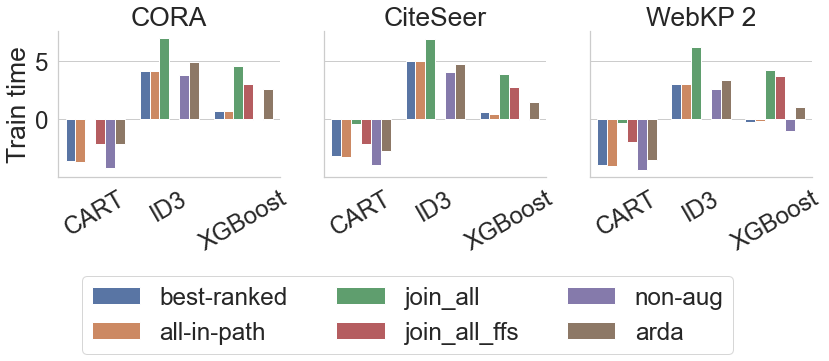

In [27]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TRAIN TIME BIG datasets
train_time_filtered
train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(big_datasets)]
# train_time_filtered = train_time_filtered[train_time_filtered['approach'] != 'join_all']
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
train_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-big.pdf', dpi=300, bbox_inches="tight")

,dataset,algorithm,approach,depth
0,CORA,CART,all-in-path,2.0
4,WebKP 2,CART,join_all_ffs,1.0
15,titanic,CART,arda,1.0
10,titanic,CART,join_all_ffs,2.0
6,PubMed_Diabetes,CART,best-ranked,1.0


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


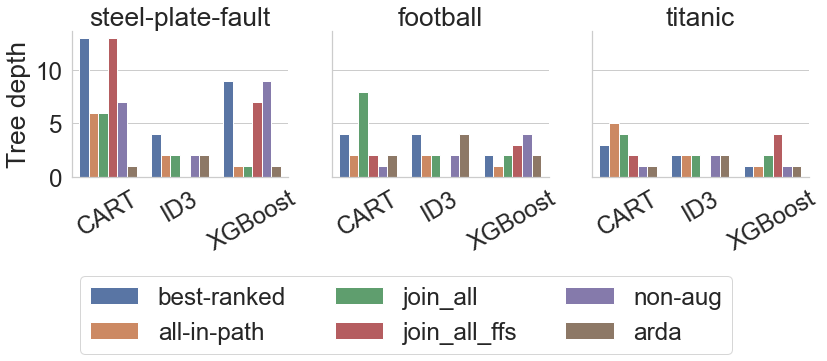

In [28]:

display(depth.head())

# DEPTH SMALL labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(small_datasets)]
depth_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-small.pdf', dpi=300, bbox_inches="tight")





,dataset,algorithm,approach,depth
0,CORA,CART,all-in-path,2.0
9,WebKP 2,CART,best-ranked,1.0
6,football,CART,join_all_ffs,2.0
15,steel-plate-fault,CART,best-ranked,13.0
3,CiteSeer,CART,non-aug,1.0


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


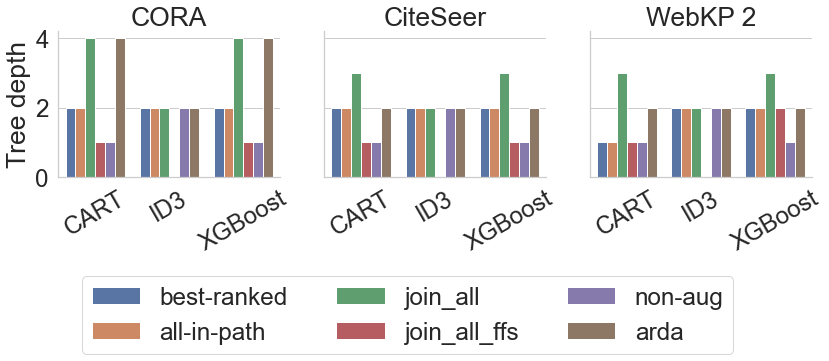

In [29]:
display(depth.head())

# DEPTH BIG labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(big_datasets)]
depth_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-big.pdf', dpi=300, bbox_inches="tight")


/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/2645544095.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to

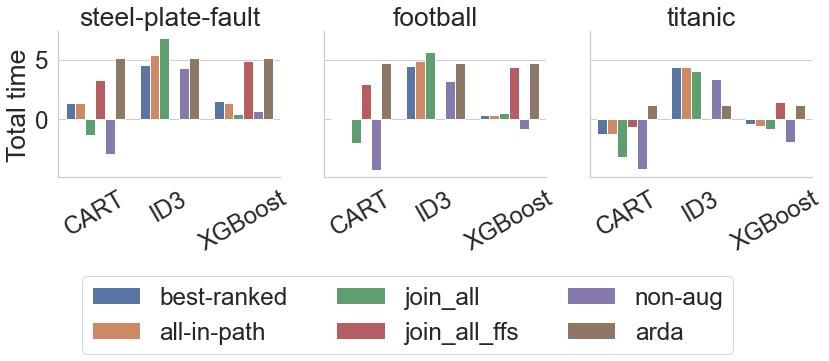

In [30]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TOTAL TIME SMALL datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(small_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
total_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/total-time-all-small.pdf', dpi=300, bbox_inches="tight")

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/1755753810.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to

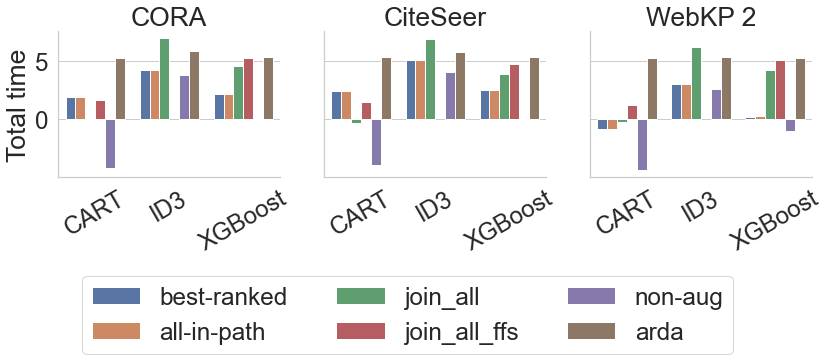

In [31]:
from cmath import log
# display(train_time)

#### TOTAL TIME BIG datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(big_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
total_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)


g.savefig('plots/total-time-all-big.pdf', dpi=300, bbox_inches="tight")